<a href="https://colab.research.google.com/github/jyoti-chn/Appartment-Complex-Reccomendation-System/blob/main/Recommendation%20Output.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
from IPython.display import HTML
from numpy import *
import matplotlib.pyplot as plt

In [ ]:
!ls

housing_data.csv  sample_data  test_housing_data.csv


In [ ]:
from numpy.random import RandomState
import pandas as pd
import numpy as np

In [ ]:
dataset = pd.read_csv('cleaned_housing_data.csv')
rng = RandomState()
train = dataset.sample(frac=0.9, random_state=rng)
test = dataset.loc[~dataset.index.isin(train.index)]
# train = pd.read_csv('train.csv')
# test = pd.read_csv('test.csv')
print(train)
print(test)

       Unnamed: 0             area_type  availability  \
8037         9595  Super built-up  Area             1   
9137        10945  Super built-up  Area             0   
6395         7629  Super built-up  Area             1   
4675         5596  Super built-up  Area             1   
11102       13298  Super built-up  Area             1   
...           ...                   ...           ...   
4841         5800  Super built-up  Area             1   
10890       13044  Super built-up  Area             0   
5361         6428        Built-up  Area             1   
6698         8014        Built-up  Area             1   
5475         6560  Super built-up  Area             1   

                             location  size  total_sqft  bath  balcony   price  
8037           Banashankari Stage III   2.0      1085.0   2.0      1.0   50.00  
9137             Divya Unnathi Layout   2.0      1339.0   2.0      1.0   53.56  
6395                         Attibele   2.0       995.0   1.0      1.0  

<ipython-input-61-8d3388a6303a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.dropna(axis=0, how='any', inplace=True)
<ipython-input-61-8d3388a6303a>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["predicted"] = model.predict(z)


       availability  size  total_sqft  bath  balcony
2                 1   3.0      1521.0   3.0      1.0
3                 1   2.0      1200.0   2.0      1.0
4                 1   2.0      1170.0   2.0      1.0
14                1   1.0       600.0   1.0      1.0
17                0   1.0       510.0   1.0      0.0
...             ...   ...         ...   ...      ...
11079             1   3.0      1226.0   2.0      2.0
11096             0   1.0       812.0   1.0      0.0
11107             1   3.0      1805.0   3.0      3.0
11109             1   3.0      1675.0   3.0      2.0
11114             1   2.0      1141.0   2.0      1.0

[1112 rows x 5 columns]
R^2 Score: 0.47823915416206797
[54.76849777]


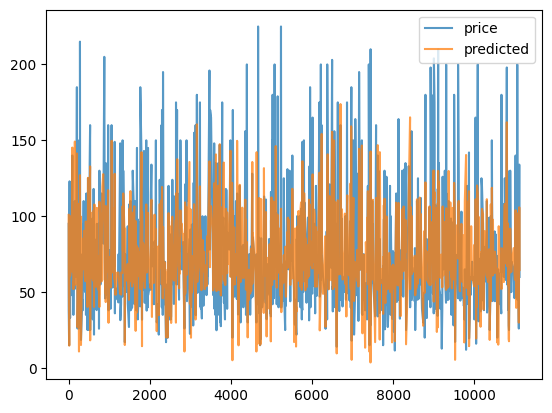

In [ ]:
train.dropna(axis=0, how='any', inplace=True)
test.dropna(axis=0, how='any', inplace=True)
column_names = ['availability', 'size', 'total_sqft', 'bath', 'balcony']

x = train[column_names]
y = train["price"]

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(x, y)

z = test[column_names]
print(z)

test["predicted"] = model.predict(z)

test[['price', 'predicted']].plot(alpha=0.75)

# Calculate R^2 score
r2 = r2_score(test["price"], test["predicted"])
print("R^2 Score:", r2)